Importing libraries and Inspection

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans  

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Data Cleansing

In [5]:
df.isnull().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

In [6]:
df.fillna(df.mean(), inplace=True)

In [7]:
df.isnull().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

In [8]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

Feature Engineering

In [9]:
df['Age'] = df['Year_Birth'].apply(lambda x: 2014-x)

In [10]:
def group_age(data):
    if data > 9 and data <= 24:
        return 'Gen Z / Zoomers (10-24)'
    elif data > 24 and data <= 40:
        return 'Gen Y / Millenials (25-40)'
    elif data > 40 and data <= 56:
        return 'Gen X (40-56)'
    elif data > 56:
        return 'Baby Boomers (57 and above)'
    return 'Unspecified'

df['Generation'] = df['Age'].apply(group_age)

In [11]:
df['Amount_Total'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [12]:
df['Total_Purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

In [13]:
df['Children'] = df['Kidhome'] + df['Teenhome']

In [14]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [15]:
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'In Relationship' if x == 'Married' or x == 'Together' else 'Single')

In [16]:
df['Family_Size'] =  df.apply(lambda x: x['Children'] + 2 if x['Marital_Status'] == 'In Relationship' else x['Children'] + 1, axis=1)

In [17]:
df['Total_AcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

In [18]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
print(df['Dt_Customer'].min())
print(df['Dt_Customer'].max())

2012-01-08 00:00:00
2014-12-06 00:00:00


In [19]:
df['Date_Collected'] = pd.to_datetime('2014-12-07')
df['Customer_Enrolled'] = (df['Date_Collected'] - df['Dt_Customer']).dt.days

In [20]:
df['Days_Active'] = df['Customer_Enrolled'] - df['Recency']

In [21]:
df.drop(columns=['ID', 'Year_Birth','Kidhome', 'Teenhome', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Date_Collected', 'Customer_Enrolled'], axis=1, inplace=True)

In [22]:
df.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Complain,Response,Age,Generation,Amount_Total,Total_Purchases,Children,Family_Size,Total_AcceptedCmp,Days_Active
0,Graduation,Single,58138.0,58,635,88,546,172,88,88,...,0,1,57,Baby Boomers (57 and above),1445,25,0,1,1,914
1,Graduation,Single,46344.0,38,11,1,6,2,1,6,...,0,0,60,Baby Boomers (57 and above),25,6,2,3,0,88
2,Graduation,In Relationship,71613.0,26,426,49,127,111,21,42,...,0,0,49,Gen X (40-56),665,21,0,2,0,447
3,Graduation,In Relationship,26646.0,26,11,4,20,10,3,5,...,0,0,30,Gen Y / Millenials (25-40),43,8,1,3,0,40
4,PhD,In Relationship,58293.0,94,173,43,118,46,27,15,...,0,0,33,Gen Y / Millenials (25-40),376,19,1,3,0,228


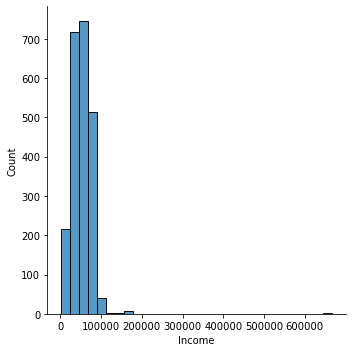

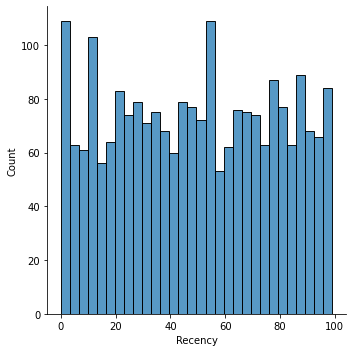

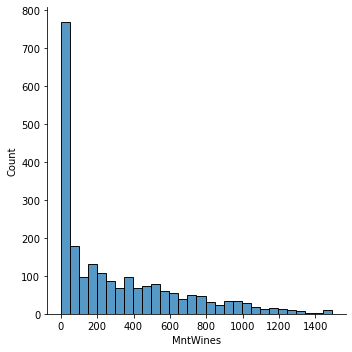

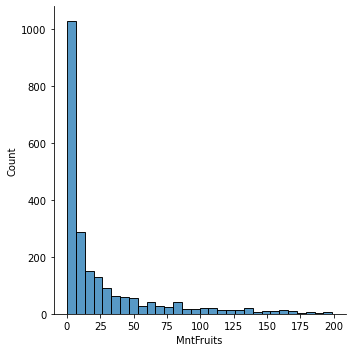

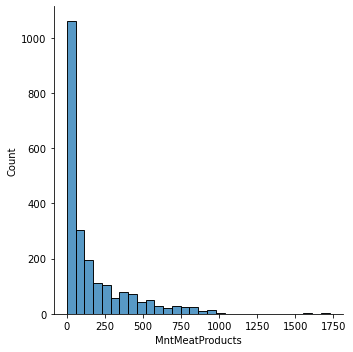

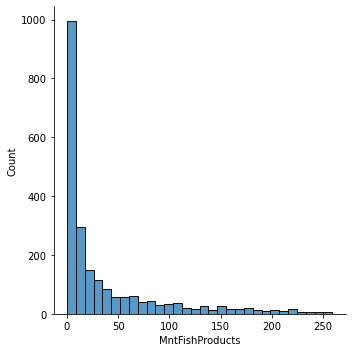

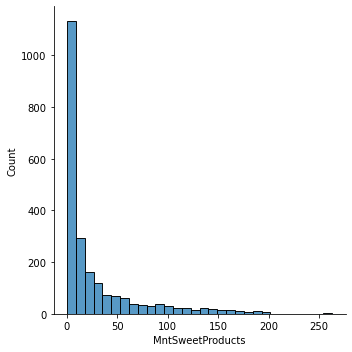

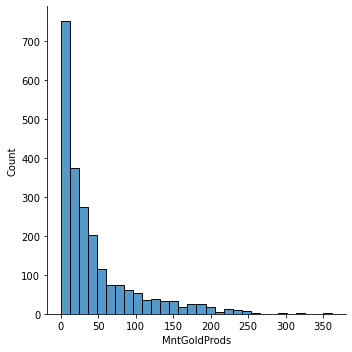

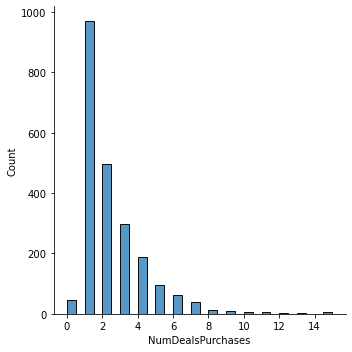

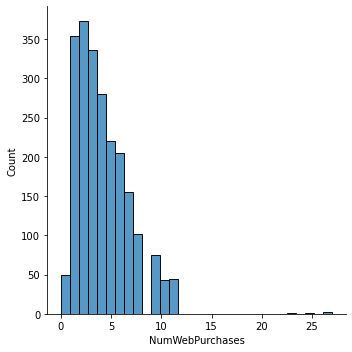

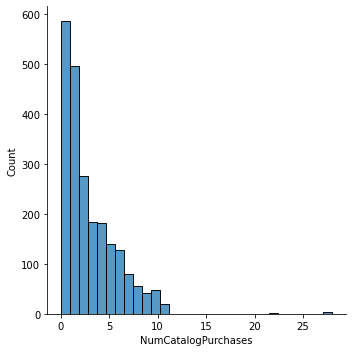

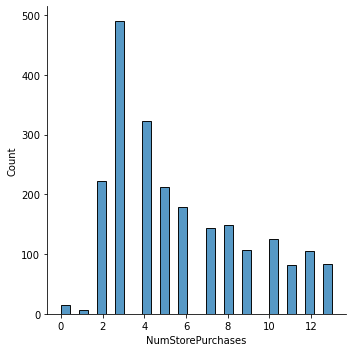

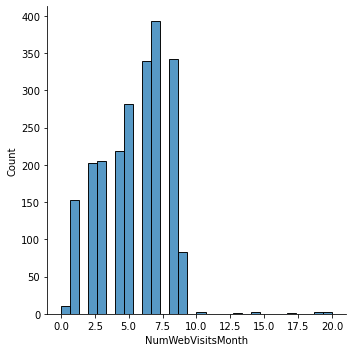

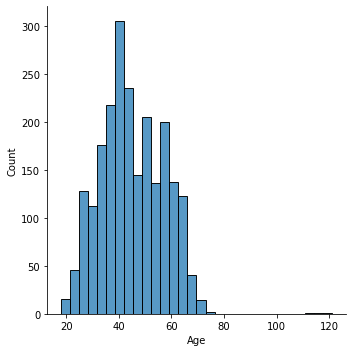

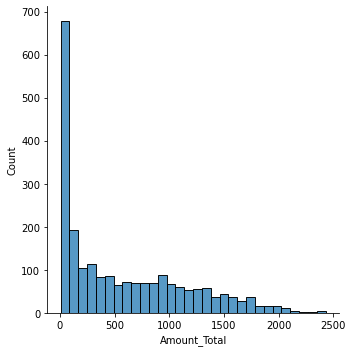

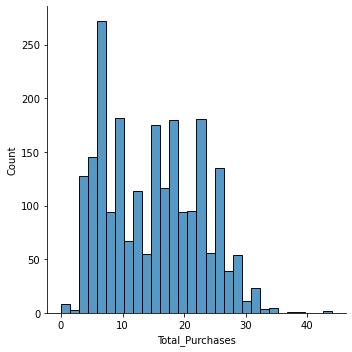

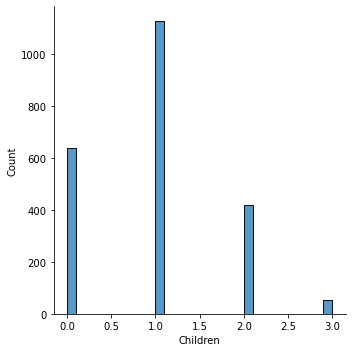

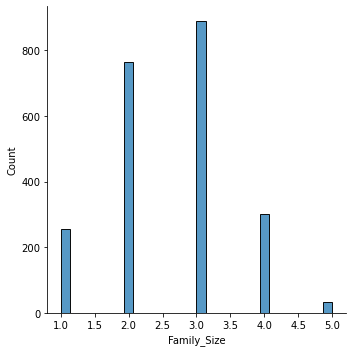

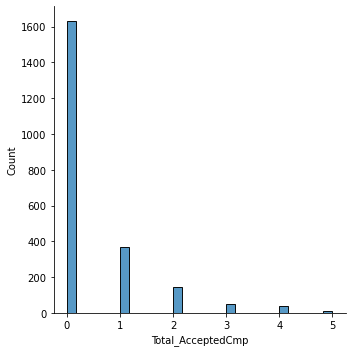

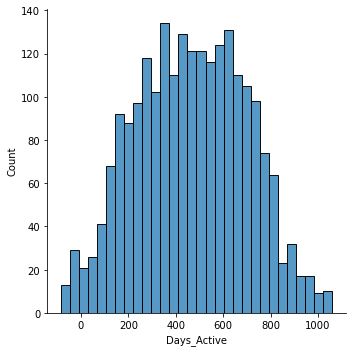

In [23]:
df_dist = df[['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 
       'Age', 'Amount_Total', 'Total_Purchases', 'Children', 'Family_Size', 'Total_AcceptedCmp', 'Days_Active']]

for i in df_dist.columns:
    sns.displot(x=i, bins=30, data=df)

Removing Outliers

In [24]:
df['Income'] = df['Income'].apply(lambda x: x if x < 120000 else np.nan)

In [25]:
df['MntMeatProducts'] = df['MntMeatProducts'].apply(lambda x: x if x < 1100 else np.nan)

In [26]:
df['NumWebPurchases'] = df['NumWebPurchases'].apply(lambda x: x if x < 15 else np.nan) 

In [27]:
df['NumCatalogPurchases'] = df['NumCatalogPurchases'].apply(lambda x: x if x < 15 else np.nan)

In [28]:
df['Total_Purchases'] = df['Total_Purchases'].apply(lambda x: x if x < 40 else np.nan) 

In [29]:
df['Age'] = df['Age'].apply(lambda x: x if x < 80 else np.nan) 

In [30]:
df.isnull().any()

Education              False
Marital_Status         False
Income                  True
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts         True
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases         True
NumCatalogPurchases     True
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Response               False
Age                     True
Generation             False
Amount_Total           False
Total_Purchases         True
Children               False
Family_Size            False
Total_AcceptedCmp      False
Days_Active            False
dtype: bool

In [31]:
df.shape

(2240, 30)

In [32]:
df.dropna(inplace=True)

In [33]:
df.isnull().any()

Education              False
Marital_Status         False
Income                 False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Response               False
Age                    False
Generation             False
Amount_Total           False
Total_Purchases        False
Children               False
Family_Size            False
Total_AcceptedCmp      False
Days_Active            False
dtype: bool

In [34]:
df.shape

(2223, 30)

In [35]:
df.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Complain,Response,Age,Generation,Amount_Total,Total_Purchases,Children,Family_Size,Total_AcceptedCmp,Days_Active
0,Graduation,Single,58138.0,58,635,88,546.0,172,88,88,...,0,1,57.0,Baby Boomers (57 and above),1445,25.0,0,1,1,914
1,Graduation,Single,46344.0,38,11,1,6.0,2,1,6,...,0,0,60.0,Baby Boomers (57 and above),25,6.0,2,3,0,88
2,Graduation,In Relationship,71613.0,26,426,49,127.0,111,21,42,...,0,0,49.0,Gen X (40-56),665,21.0,0,2,0,447
3,Graduation,In Relationship,26646.0,26,11,4,20.0,10,3,5,...,0,0,30.0,Gen Y / Millenials (25-40),43,8.0,1,3,0,40
4,PhD,In Relationship,58293.0,94,173,43,118.0,46,27,15,...,0,0,33.0,Gen Y / Millenials (25-40),376,19.0,1,3,0,228


In [36]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Generation',
       'Amount_Total', 'Total_Purchases', 'Children', 'Family_Size',
       'Total_AcceptedCmp', 'Days_Active'],
      dtype='object')

Data Visualization

Education

<AxesSubplot:xlabel='Education', ylabel='count'>

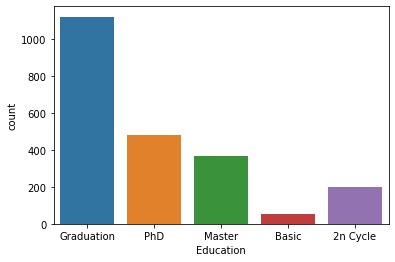

In [37]:
sns.countplot(x='Education', data=df)

Marital Status

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

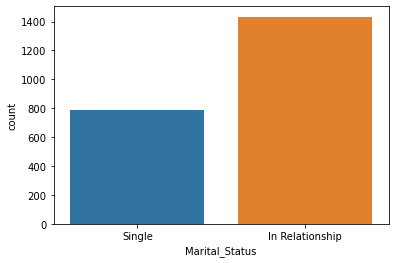

In [38]:
sns.countplot(x='Marital_Status', data=df)

Place

Text(0.5, 1.0, 'Total purchases of each place')

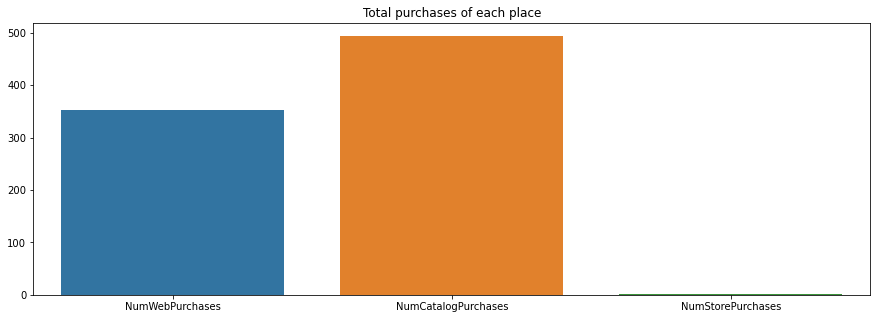

In [39]:
each_place = ['NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']
total_place = []
[total_place.append(len(df[df[place] == 1])) for place in each_place]

plt.figure(figsize=(15,5))
sns.barplot(x=each_place, y=total_place)
plt.title('Total purchases of each place')

Text(0.5, 1.0, 'Total amount of each products')

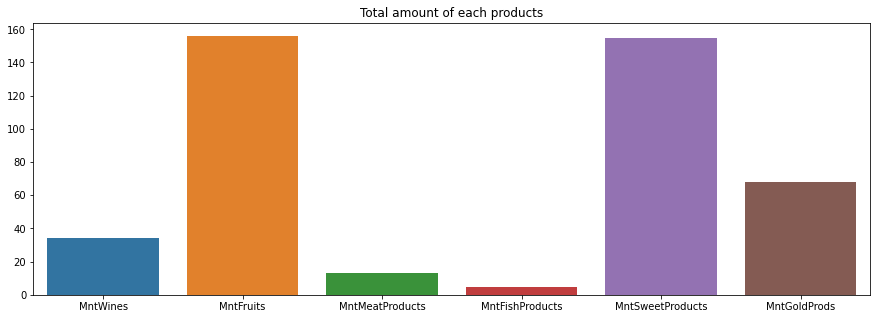

In [40]:
each_prods = ['MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']
total_prods = []
[total_prods.append(len(df[df[prod] == 1])) for prod in each_prods]

plt.figure(figsize=(15,5))
sns.barplot(x=each_prods, y=total_prods)
plt.title('Total amount of each products')

Text(0.5, 1.0, 'Total of Accepted Campaign offers on each Campaigns')

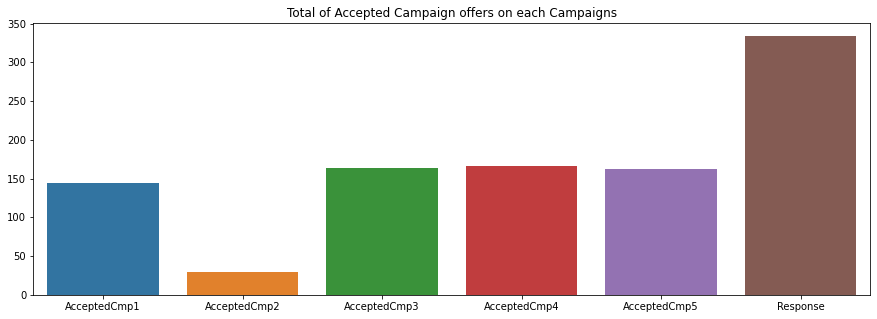

In [41]:
each_cmp = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
total_cmp = []
[total_cmp.append(len(df[df[cmp] == 1])) for cmp in each_cmp]

plt.figure(figsize=(15,5))
sns.barplot(x=each_cmp, y=total_cmp)
plt.title('Total of Accepted Campaign offers on each Campaigns')

<AxesSubplot:xlabel='Complain', ylabel='count'>

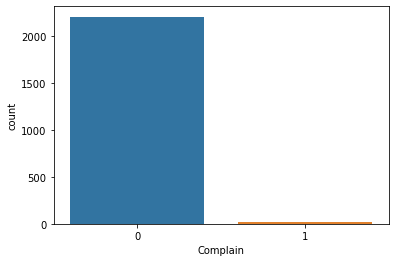

In [42]:
sns.countplot(x='Complain', data=df)

Text(0.5, 1.0, 'Generation')

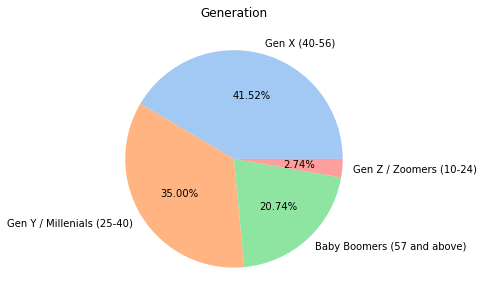

In [43]:
colors = sns.color_palette('pastel')[0:5]
Generation = df['Generation'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(Generation, labels = Generation.index, colors = colors, autopct='%1.2f%%')
plt.title('Generation')

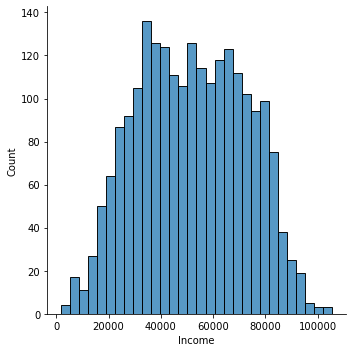

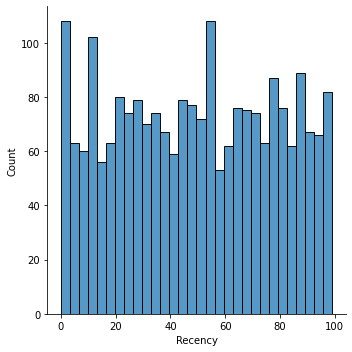

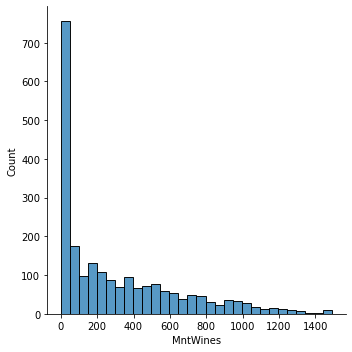

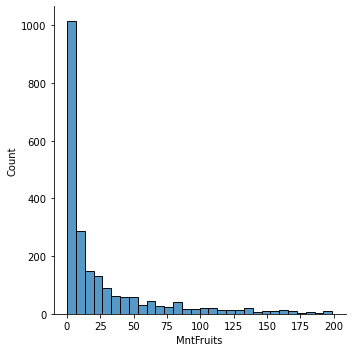

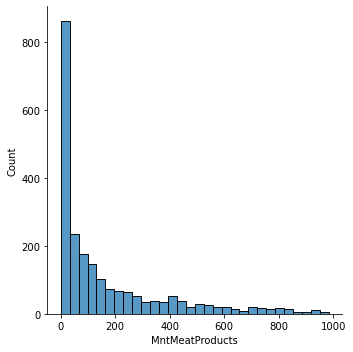

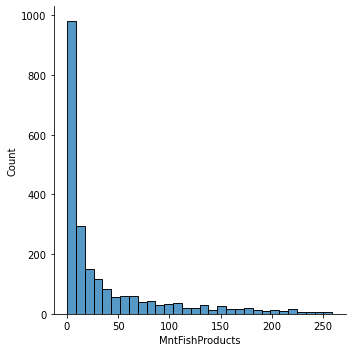

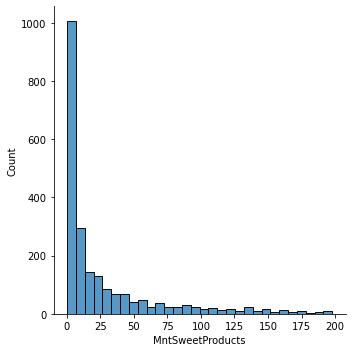

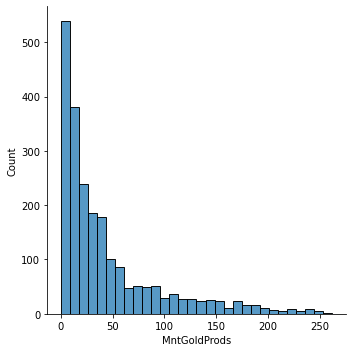

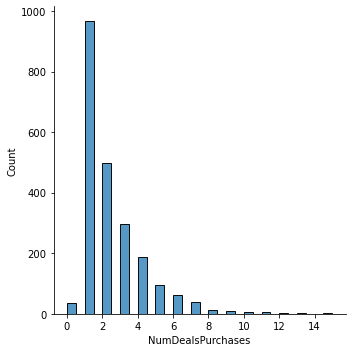

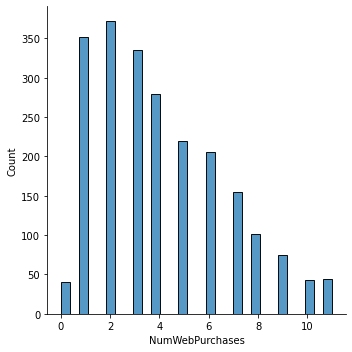

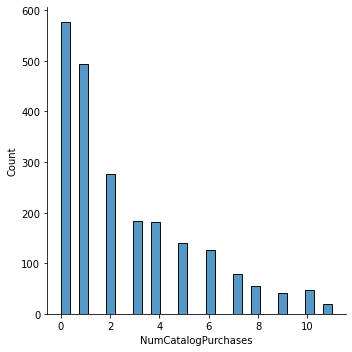

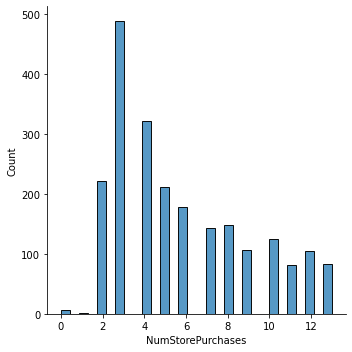

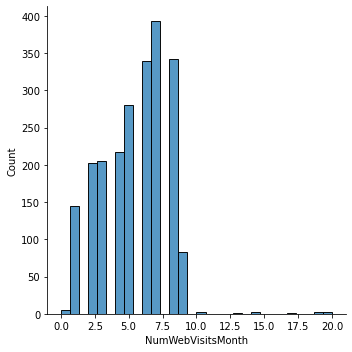

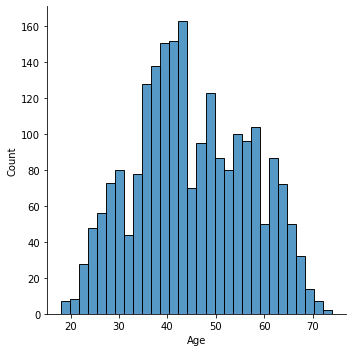

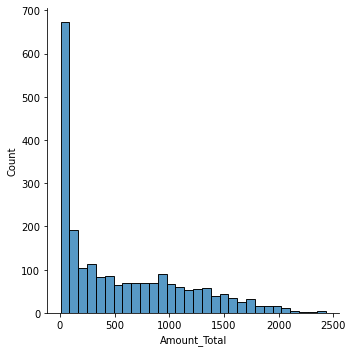

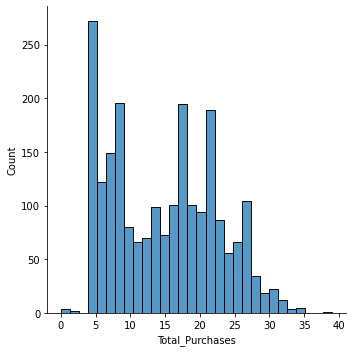

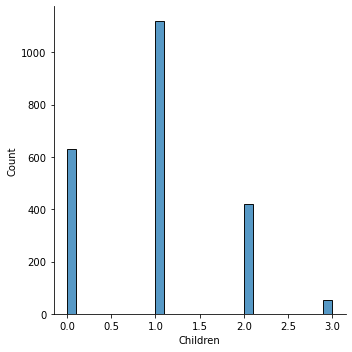

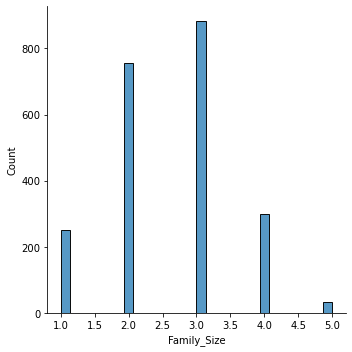

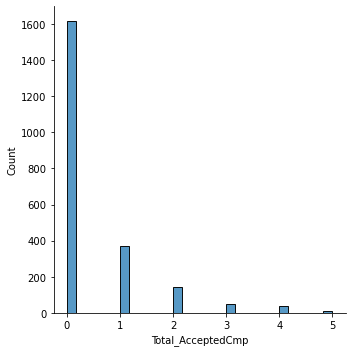

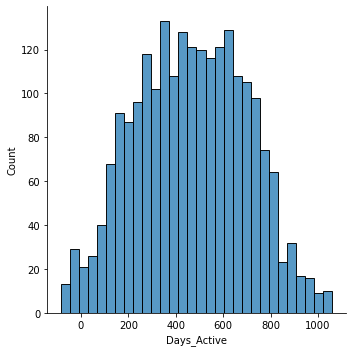

In [44]:
df_dist = df[['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 
       'Age', 'Amount_Total', 'Total_Purchases', 'Children', 'Family_Size', 'Total_AcceptedCmp', 'Days_Active']]

for i in df_dist.columns:
    sns.displot(x=i, bins=30, data=df)

<AxesSubplot:>

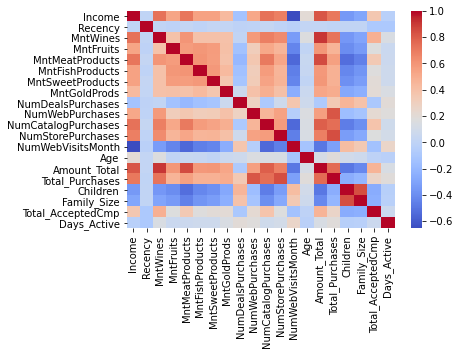

In [45]:
sns.heatmap(data=df_dist.corr(), cmap='coolwarm')

<AxesSubplot:xlabel='Education', ylabel='Income'>

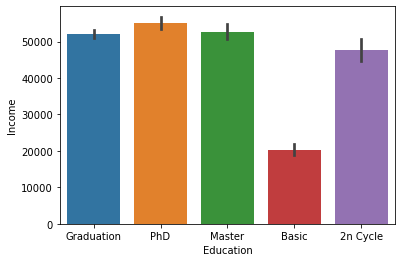

In [46]:
sns.barplot(x='Education', y='Income', data=df)

<AxesSubplot:xlabel='Marital_Status', ylabel='Income'>

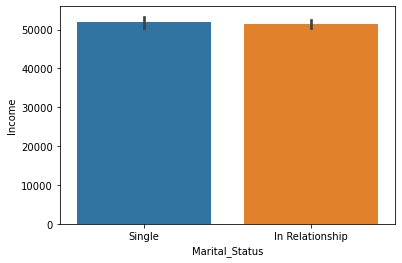

In [47]:
sns.barplot(x='Marital_Status', y='Income', data=df)

<AxesSubplot:xlabel='Amount_Total', ylabel='Income'>

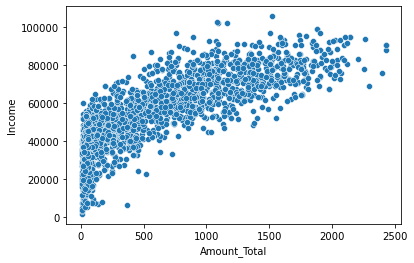

In [48]:
sns.scatterplot(x='Amount_Total', y='Income', data=df)

<AxesSubplot:xlabel='Total_Purchases', ylabel='Income'>

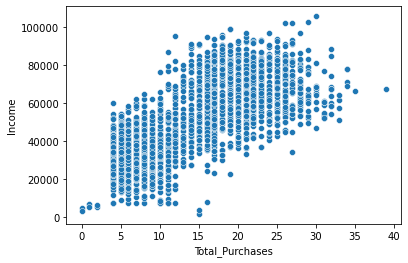

In [49]:
sns.scatterplot(x='Total_Purchases', y='Income', data=df)

Data Modelling using KMeans

In [50]:
df['Education'] = df['Education'].apply(lambda x: 0 if x == 'Basic' else 1)

In [51]:
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 1 if x == 'In Relationship' else 0)

In [52]:
model_features = df[['Education', 'Marital_Status', 'Income', 'Age', 'Amount_Total','Total_Purchases', 
                     'Children', 'Total_AcceptedCmp', 'Days_Active']]

In [53]:
scaler = StandardScaler()

In [54]:
scaled_features = scaler.fit_transform(model_features)

In [55]:
df_feat = pd.DataFrame(scaled_features,columns=model_features.columns)
df_feat.head()

,Education,Marital_Status,Income,Age,Amount_Total,Total_Purchases,Children,Total_AcceptedCmp,Days_Active
0,0.157786,-1.34682,0.315669,1.015735,1.548620,1.338821,-1.266464,0.616698,1.929847
1,0.157786,-1.34682,-0.259374,1.272139,-0.956407,-1.165509,1.393290,-0.503335,-1.611655
2,0.157786,0.74249,0.972672,0.331991,0.172619,0.811593,-1.266464,-0.503335,-0.072431
3,0.157786,0.74249,-1.219794,-1.291901,-0.924653,-0.901895,0.063413,-0.503335,-1.817457
4,0.157786,0.74249,0.323226,-1.035497,-0.337206,0.547980,0.063413,-0.503335,-1.011401


In [56]:
X = scaled_features

In [57]:
#Elbow Method - Inertia plot
inertia = []
#looping the inertia calculation for each k
for k in range(1, 10):
    #Assign KMeans as cluster_model
    cluster_model = KMeans(n_clusters = k, random_state = 101)
    #Fit cluster_model to X
    cluster_model.fit(X)
    #Get the inertia value
    inertia_value = cluster_model.inertia_
    #Append the inertia_value to inertia list
    inertia.append(inertia_value)

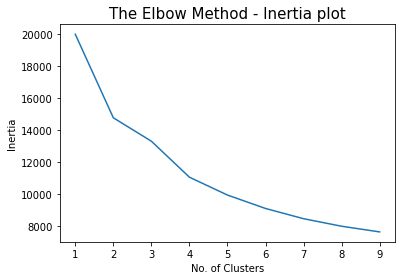

In [58]:
##Inertia plot
plt.plot(range(1, 10), inertia)
plt.title('The Elbow Method - Inertia plot', fontsize = 15)
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.show()

In [59]:
kmeans = KMeans(n_clusters = 4, random_state = 101)
kmeans.fit(X)

KMeans(n_clusters=4, random_state=101)

In [60]:
kmeans.cluster_centers_

array([[ 0.1577855 , -0.14294264,  1.29880838, -0.06770685,  1.6195125 ,
         0.80277345, -0.97972483,  2.04068132,  0.11084913],
       [ 0.1577855 ,  0.02292671, -0.75727638, -0.17887078, -0.80926828,
        -0.82686309,  0.44824454, -0.30568186, -0.13664633],
       [ 0.1577855 ,  0.01888719,  0.62807393,  0.29117659,  0.54985829,
         0.84072784, -0.22739942, -0.24649501,  0.1115326 ],
       [-6.33771778, -0.03132868, -1.52890179, -0.73319347, -0.88630013,
        -1.03126139, -0.30599735, -0.33740394,  0.36759699]])

In [61]:
model_features['Cluster'] = kmeans.labels_ + 1

<ipython-input-61-6aa65b437f9a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_features['Cluster'] = kmeans.labels_ + 1


In [62]:
model_features.head()

,Education,Marital_Status,Income,Age,Amount_Total,Total_Purchases,Children,Total_AcceptedCmp,Days_Active,Cluster
0,1,0,58138.0,57.0,1445,25.0,0,1,914,3
1,1,0,46344.0,60.0,25,6.0,2,0,88,2
2,1,1,71613.0,49.0,665,21.0,0,0,447,3
3,1,1,26646.0,30.0,43,8.0,1,0,40,2
4,1,1,58293.0,33.0,376,19.0,1,0,228,3


Text(0.5, 1.0, 'Clusters')

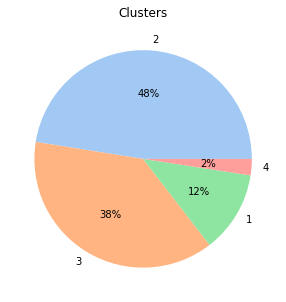

In [63]:
colors = sns.color_palette('pastel')[0:5]
Cluster = model_features['Cluster'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(Cluster, labels = Cluster.index, colors = colors, autopct='%.0f%%')
plt.title('Clusters')

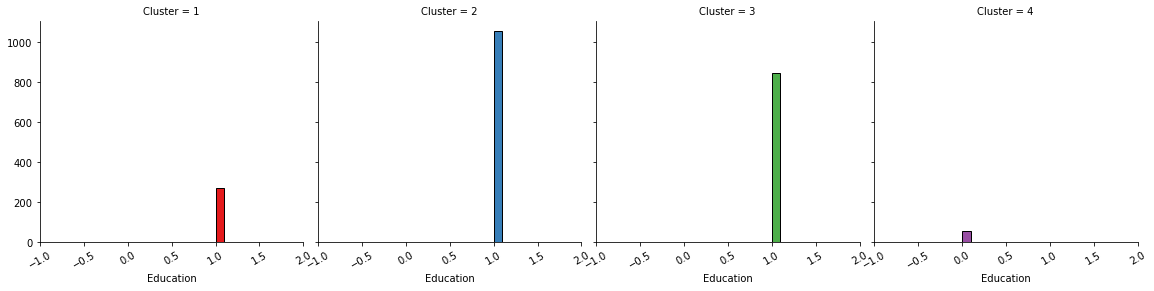

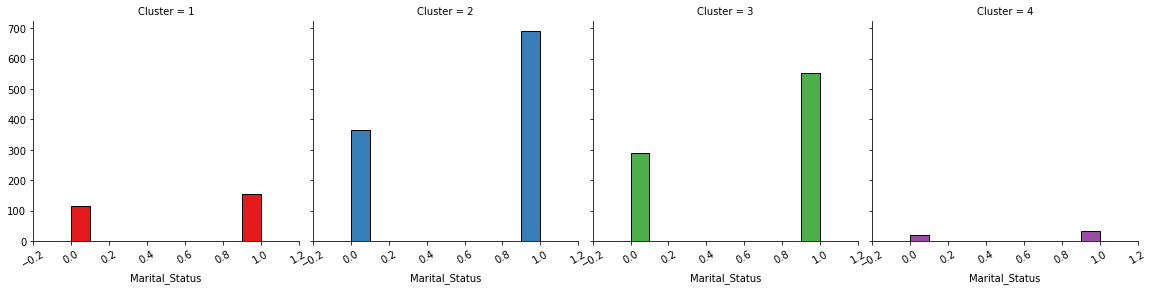

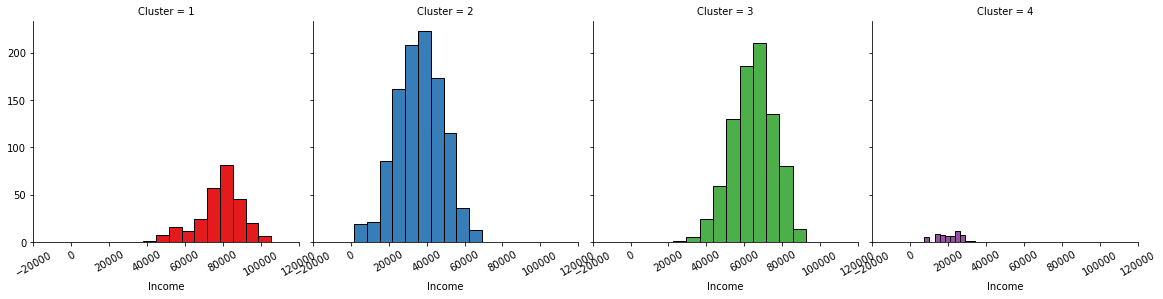

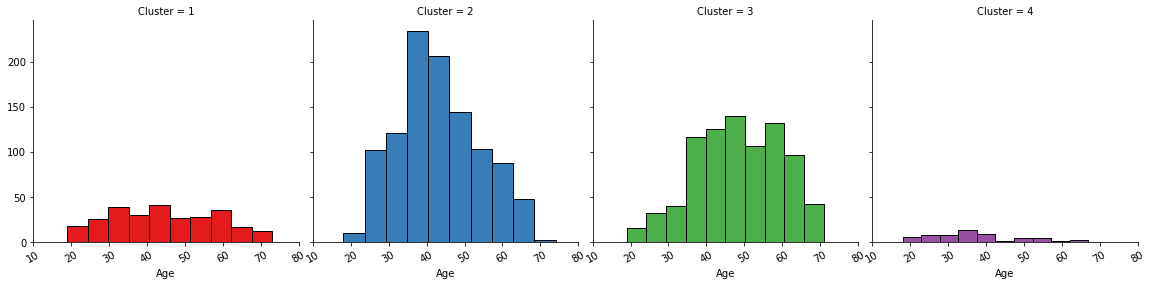

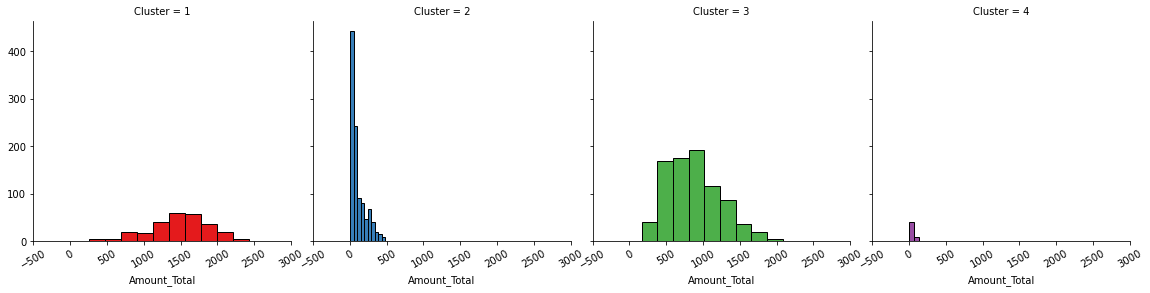

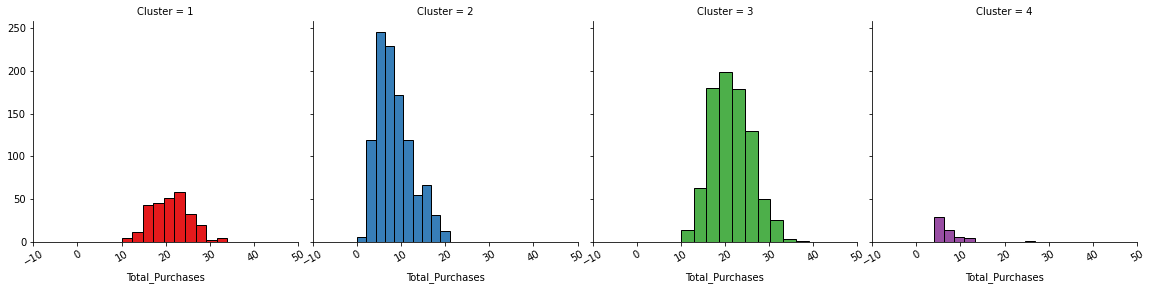

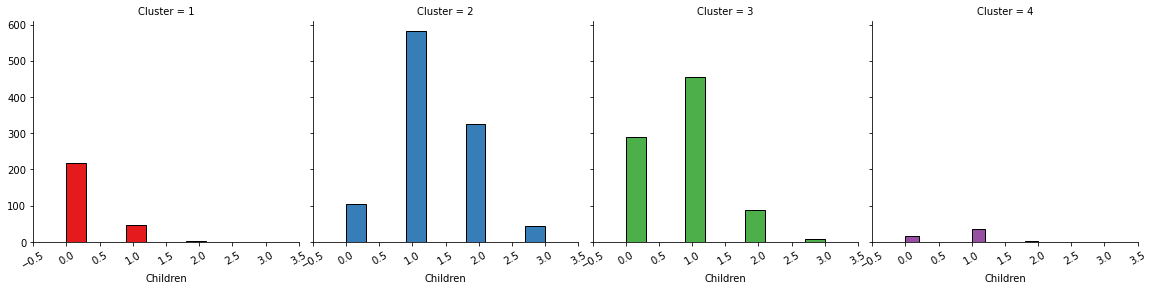

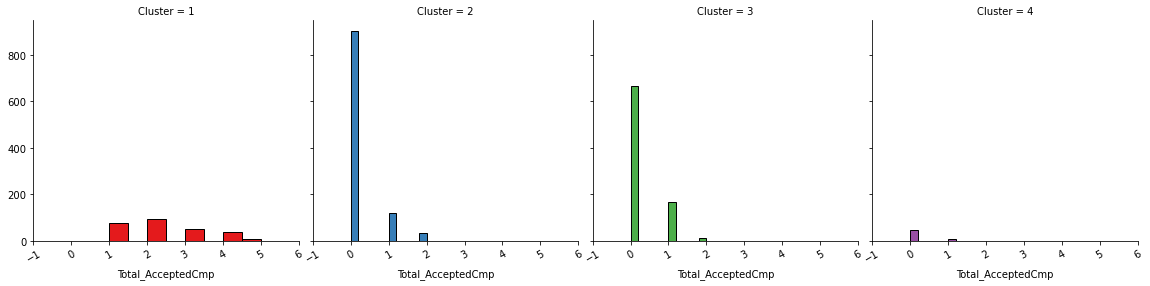

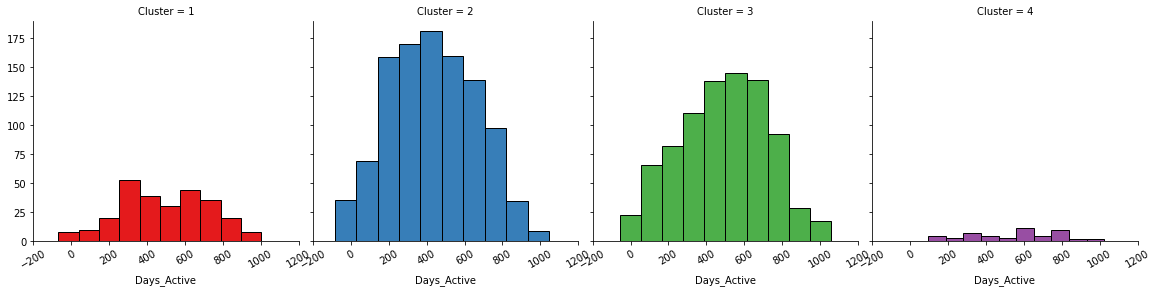

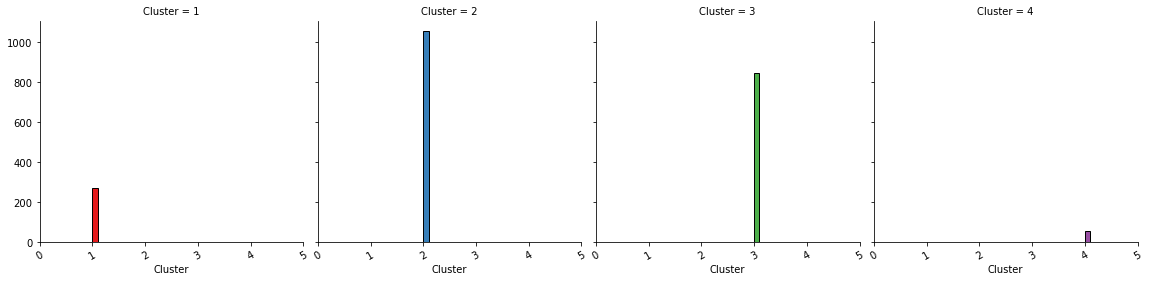

In [64]:
for i in model_features:
    diag = sns.FacetGrid(model_features, col = 'Cluster', hue = 'Cluster', palette = "Set1", height=4)
    diag.map(plt.hist, i, bins=10, ec="k") 
    diag.set_xticklabels(rotation=30, color = 'black')

<font size="4">From this prediction, there are four types of customers: </font>

<font size="4">1. 48% of customers (Majority)</font><br><br>
<font size="3">- All of them are Postgraduates</font><br>
<font size="3">- Higher number of people who are in relationship than single people</font><br>
<font size="3">- Have an approximately 20k-50k of income</font><br>
<font size="3">- Around 25 to 60 years old with the maximum around 35 to 45 years old</font><br>
<font size="3">- Bought approximately 50-400 products</font><br>
<font size="3">- Made a purchase approximately 5-20 times</font><br>
<font size="3">- Higher number of children than no child</font><br>
<font size="3">- Most of them reject the marketing campaign</font><br>
<font size="3">- Highest number of customers who have loyalty with the company for a long period of time</font><br>

<font size="4">2. 38% of customers</font><br><br>
<font size="3">- Slightly lower number of Postgraduates than 48% of people</font><br>
<font size="3">- It's the same circumstances as 48% of people but slightly lower number of people</font><br>
<font size="3">- Have an approximately 40k-80k of income</font><br>
<font size="3">- Around 30 to 70 years old with the maximum around 45 to 60 years old</font><br>
<font size="3">- Bought approximately 500-1700 products</font><br>
<font size="3">- Made a purchase approximately 15-30 times</font><br>
<font size="3">- Slightly higher number of children than no child</font><br>
<font size="3">- Most of them reject the marketing campaign</font><br>
<font size="3">- Slightly lower number of loyal customers compared to 48% of customers</font><br>

<font size="4">3. 12% of customers</font><br><br>
<font size="3">- Significantly lower Postgraduates than the 38% of people</font><br>
<font size="3">- The number of people who are in relationship are slightly higher than single people</font><br>
<font size="3">- Have an approximately 70k-90k of income</font><br>
<font size="3">- Around 20 to 70 years old with the maximum around 30 to 60 years old</font><br>
<font size="3">- Bought approximately 800-2000 products</font><br>
<font size="3">- Made a purchase approximately 15-25 times</font><br>
<font size="3">- Higher number of no child than have children</font><br>
<font size="3">- None of them reject the marketing campaign</font><br>
<font size="3">- Significantly lower number of loyal customers compared to 38% of customers</font><br>

<font size="4">4. 2% of customers (Minority)</font><br><br>
<font size="3">- All of them are Undergraduates</font><br>
<font size="3">- It's the same circumstances as 12% of customers but with lower number</font><br>
<font size="3">- Have an approximately 15k-30k of income</font><br>
<font size="3">- Around 20 to 65 years old with the maximum around 35 to 40 years old</font><br>
<font size="3">- Bought approximately 20-100 products</font><br>
<font size="3">- Made a purchase approximately 5-10 times</font><br>
<font size="3">- Slightly higher number of children than no child</font><br>
<font size="3">- Most of them reject the marketing campaign</font><br>
<font size="3">- Least number of loyal customers</font><br>